<a href="https://colab.research.google.com/github/plaban1981/30-Days-ML---Kaggle/blob/main/%5B30_Days_of_ML%5D_Day_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

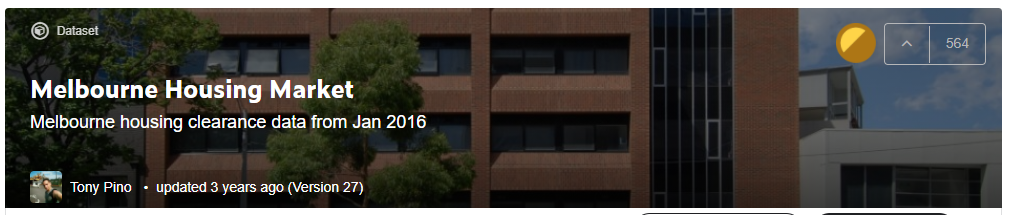

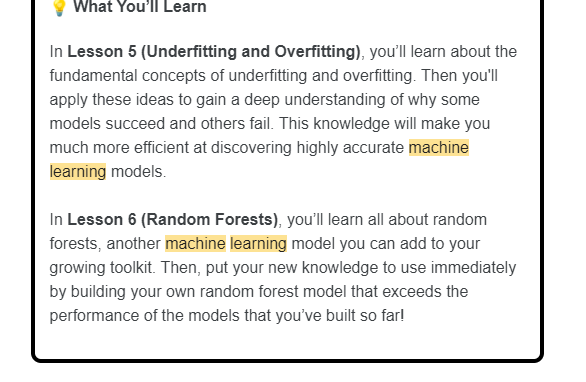

## Experimenting with different models

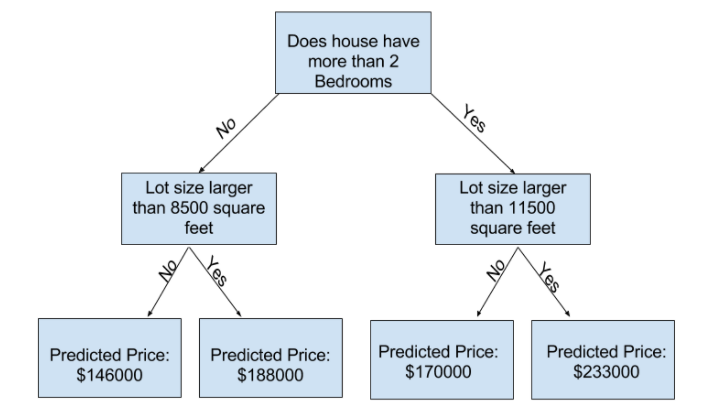

* In practice, it's not uncommon for a tree to have 10 splits between the top level (all houses) and a leaf. 

* As the tree gets deeper, the dataset gets sliced up into leaves with fewer houses. 

* If a tree only had 1 split, it divides the data into 2 groups. 

* If each group is split again, we would get 4 groups of houses. Splitting each of those again would create 8 groups. 

* If we keep doubling the number of groups by adding more splits at each level, we'll have  210  groups of houses by the time we get to the 10th level. That's 1024 leaves.

* When we divide the houses amongst many leaves, we also have fewer houses in each leaf. 

* Leaves with very few houses will make predictions that are quite close to those homes' actual values, but they may make very unreliable predictions for new data (because each prediction is based on only a few houses).

* This is a phenomenon called **overfitting**, where a model matches the training data almost perfectly, but does poorly in validation and other new data

* On the flip side, if we make our tree very shallow, it doesn't divide up the houses into very distinct groups.

*  When a model fails to capture important distinctions and patterns in the data, so it performs poorly even in training data, that is called **underfitting**.

* Since we care about accuracy on new data, which we estimate from our validation data, we want to find the sweet spot between underfitting and overfitting. 

* Visually, we want the low point of the (red) validation curve in the figure below.

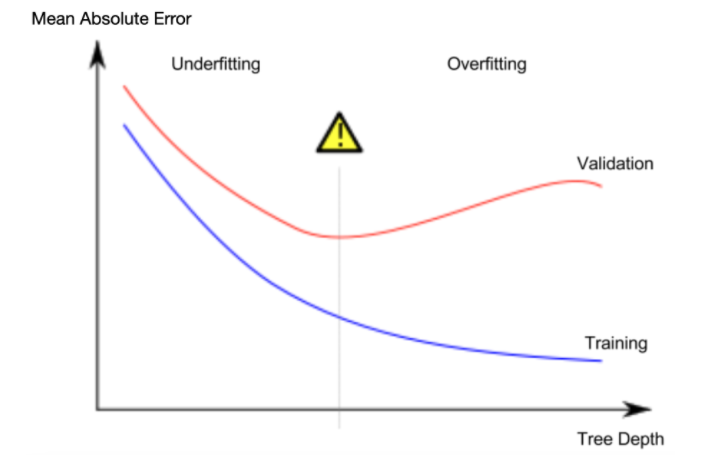

* The **max_leaf_nodes** argument provides a very sensible way to control overfitting vs underfitting. The more leaves we allow the model to make, the more we move from the underfitting area in the above graph to the overfitting area.

## Utility function to help compare MAE scores from different values for max_leaf_nodes:

In [8]:
from google.colab import files
files.upload()

Saving archive (1).zip to archive (1).zip


{'archive (1).zip': b'PK\x03\x04-\x00\x00\x00\x08\x00\xcf\x0e4O\xf10\x8dp\xff\xff\xff\xff\xff\xff\xff\xff\x1f\x00\x14\x00MELBOURNE_HOUSE_PRICES_LESS.csv\x01\x00\x10\x00\xa2Uo\x00\x00\x00\x00\x00u2\x14\x00\x00\x00\x00\x00\xbc\xbdIw\xdbJ\xb3-8\xaf\xb5\xea?`Tw\x82g";4\xb3\x92\xe4F>\x96l\x95\xe4w\xbc\xee\x10"a\x11O \xa0\x0b\x82\xd2\xe1\xf9\xf5\x15\x91\x1d@2\x13\x92E\xf0{o\xad\xef\x1e\xab\xdbL 32\x9a\x1d;\xee6\xf7\x9b\xf6><[,\xdab\xbd\x0eo\x9bf\xb5\x0e\x7fn\x9f\x8a\xf0\xa6-\xe7Ex]t\xcbf\x11\xde\x15UU\xb4_\xc2\x8fy\x07\xdfi\xd6\xdd\xbcY\x14\xe1m\xf1P6u\x9d\xaf\xf0\xa7\x9b\xa7\xa2\xed\xb6\xf3fSw\xe1\xc7r\xdd\xe55\xfc\xfa\x05\xfcs^Vgm\x91\xff\xdf\xff\xd7\xd9\xfd}\xd3\xad\x7f7\xed"\xe4YpUv\xcb\x87\xe6%\xb8\xebB\x16.C\xc2\xb3\x08\xfe_x\x17\xfe\x05X\xe5:$\xb3\x88\xcfhD\x92\x90Eq\x12~o\xdanY\xb4u\x00\x9f\x08\xb0\x9a\xaa\x04\x84\x90G$\x83_\xff\xef\xbcm\xf3\xe0\xa2\xec\xb6\x81F\xdcA\x13\xd9Y\xf0s\xd3\xd6Ek\xd1(\xd5h\xd7y\xbb^\xe6U5%\x1e!\xd9y\xa0~\xc6\xae\xce\xe0}/\xaauSO\x80V\xb4\xbf\x8bjQ\x16a\x9c

In [9]:
!unzip "/content/archive (1).zip"

Archive:  /content/archive (1).zip
  inflating: MELBOURNE_HOUSE_PRICES_LESS.csv  
  inflating: Melbourne_housing_FULL.csv  


In [11]:
# Data Loading Code Runs At This Point
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
    
# Load data
melbourne_file_path = "/content/Melbourne_housing_FULL.csv"
melbourne_data = pd.read_csv(melbourne_file_path,error_bad_lines=False)
# Filter rows with missing values
filtered_melbourne_data = melbourne_data.dropna(axis=0)
# Choose target and features
y = filtered_melbourne_data.Price
melbourne_features = ['Rooms', 'Bathroom', 'Landsize', 'BuildingArea','YearBuilt', 'Lattitude', 'Longtitude']
X = filtered_melbourne_data[melbourne_features]


# split data into training and validation data, for both features and target
train_X, val_X, train_y, val_y = train_test_split(X, y,random_state = 0)

In [15]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.tree import DecisionTreeRegressor

In [13]:
def get_mae(max_leaf_nodes, train_X, val_X, train_y, val_y):
    model = DecisionTreeRegressor(max_leaf_nodes=max_leaf_nodes, random_state=0)
    model.fit(train_X, train_y)
    preds_val = model.predict(val_X)
    mae = mean_absolute_error(val_y, preds_val)
    return(mae)

In [16]:
# compare MAE with differing values of  max_leaf_nodes
for max_leaf_nodes in [5, 50, 500, 5000]:
    my_mae = get_mae(max_leaf_nodes, train_X, val_X, train_y, val_y)
    print("Max leaf nodes: %d  \t\t Mean Absolute Error:  %d" %(max_leaf_nodes, my_mae))

Max leaf nodes: 5  		 Mean Absolute Error:  366215
Max leaf nodes: 50  		 Mean Absolute Error:  261623
Max leaf nodes: 500  		 Mean Absolute Error:  245115
Max leaf nodes: 5000  		 Mean Absolute Error:  257957


* Of the options listed, 500 is the optimal number of leaves.

## Conclusion

Models can suffer from either:

* Overfitting: capturing spurious patterns that won't recur in the future, leading to less accurate predictions, or
* Underfitting: failing to capture relevant patterns, again leading to less accurate predictions.

* We use validation data, which isn't used in model training, to measure a candidate model's accuracy. This lets us try many candidate models and keep the best one.